In [ ]:
# Usando os dados coletados e contidos no arquivo CSV "dados_climaticos.csv", 
# que contém dados de temperatura máxima, temperatura mínima, umidade do ar e
# incidência de radiação UV para cada dia, de 01/01/2020 a 31/01/2023, crie um
# DataFrame Pandas e realize sua análise, respondendo às perguntas a seguir:

In [86]:

import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

temperaturas = pd.read_csv('dados_climaticos.csv', parse_dates=['Data'], dayfirst=True)
dados = pd.DataFrame(temperaturas)
dados.set_index(dados['Data'], inplace= True)


print(dados)

                 Data  Temp_Max  Temp_Min  Umidade  Radiacao_UV
Data                                                           
2020-01-01 2020-01-01        26        12       77           10
2020-01-02 2020-01-02        29        14       59           10
2020-01-03 2020-01-03        30        16       69            9
2020-01-04 2020-01-04        29        17       45           10
2020-01-05 2020-01-05        27        18       55            8
...               ...       ...       ...      ...          ...
2023-01-27 2023-01-27        35        19       60            7
2023-01-28 2023-01-28        35        19       59            1
2023-01-29 2023-01-29        37        15       43            3
2023-01-30 2023-01-30        35        19       43           10
2023-01-31 2023-01-31        35        15       47            7

[1127 rows x 5 columns]


In [87]:
# 1. Qual é a temperatura média ao longo dos meses (para cada mês)?



In [88]:

dados['Data'] = pd.to_datetime(dados['Data'])


dados['Mês'] = dados['Data'].dt.month
dados['Ano'] = dados['Data'].dt.year


med = dados.groupby(['Mês','Ano'])['Temp_Max'].mean()
print(med)


Mês  Ano 
1    2020    30.129032
     2021    30.064516
     2022    31.096774
     2023    32.580645
2    2020    29.172414
     2021    29.142857
     2022    28.642857
3    2020    28.709677
     2021    29.774194
     2022    29.741935
4    2020    30.400000
     2021    29.000000
     2022    29.466667
5    2020    24.419355
     2021    24.677419
     2022    24.645161
6    2020    24.433333
     2021    24.500000
     2022    24.466667
7    2020    24.419355
     2021    24.580645
     2022    23.483871
8    2020    24.548387
     2021    24.580645
     2022    23.645161
9    2020    29.400000
     2021    30.733333
     2022    30.133333
10   2020    29.419355
     2021    28.935484
     2022    29.322581
11   2020    28.766667
     2021    29.666667
     2022    29.400000
12   2020    28.967742
     2021    29.870968
     2022    29.064516
Name: Temp_Max, dtype: float64


In [66]:
# 2. Qual foi a temperatura máxima registrada durante o período de análise?

In [67]:
dtTemp = dados.loc[dados['Temp_Max'].idxmax()]['Data']


tempM = dados['Temp_Max'].max()


print(f'Temperatura Máxima: {tempM}º , Dia: {dtTemp}')


Temperatura Máxima: 39º , Dia: 2023-01-26 00:00:00


In [68]:
# 3. Em que mês ocorreu a umidade do ar média foi mais elevada?

In [69]:
dtUmi = dados.loc[dados['Umidade'].idxmax()]['Data']


umiMax = dados['Umidade'].max()


print(f'Umidade Máxima: {umiMax}, Dia: {dtUmi}')


Umidade Máxima: 80, Dia: 2020-03-10 00:00:00


In [70]:
# 4. Qual foi o mês mais quente (com temperatura média mais alta)?

In [71]:
mesQue = med.idxmax()

temQue = med.max()

print(f'Mês/Ano mais quente: {mesQue}, com média de: {round(temQue, 2)}')


Mês/Ano mais quente: (1, 2023), com média de: 32.58


In [72]:
# 5. Qual tendência pode ser detectada analisando os dados?

In [73]:
# 6. Qual o valor médio de incidência de raios UV em 2022?

In [74]:
dados['Ano'] = dados['Data'].dt.year

ano = dados[dados['Ano']==2022]['Radiacao_UV'].mean()
print(f'Valor médio de incidência de raios UV em 2022: {round(ano, 2)}')


Valor médio de incidência de raios UV em 2022: 5.37


In [75]:
# 7. Plote um gráfico (de linhas) de temperatura ao longo do tempo (todo o período).

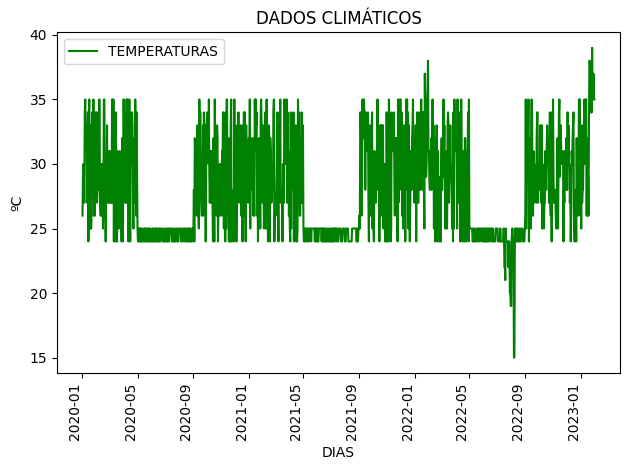

In [76]:

fig, ax = plt.subplots()

ax.plot(dados['Temp_Max'], color='green', label = 'TEMPERATURAS')


plt.ylabel('ºC')
plt.title('DADOS CLIMÁTICOS')
ax.set_xlabel('DIAS')
ax.legend()
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [77]:
# 8. Crie um gráfico de barras que mostre a temperatura média por mês.




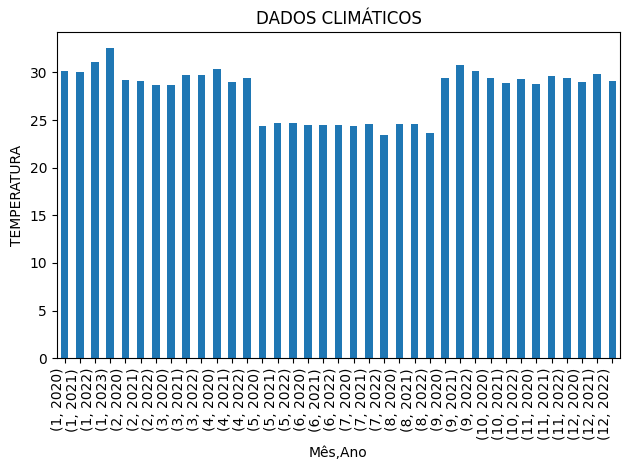

In [81]:
dados.groupby(['Mês','Ano'])['Temp_Max'].mean().plot.bar()
plt.ylabel('TEMPERATURA')
plt.title('DADOS CLIMÁTICOS')

ax.legend()
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
